In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, log_loss, classification_report, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

In [149]:
heart = pd.read_csv("/Users/ashishpandey009/Documents/AIT 580/Project/Final Project/heart.csv", header=0)

In [150]:
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [151]:
heart_dup = pd.get_dummies(heart)
heart_dup.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,1,0,0,1,1,0,...,0,0,0,1,0,1,1,0,0,1
1,20.34,0.0,0.0,7.0,1,0,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,26.58,20.0,30.0,8.0,1,0,0,1,1,0,...,1,0,0,0,0,1,1,0,1,0
3,24.21,0.0,0.0,6.0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
4,23.71,28.0,0.0,8.0,1,0,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0


In [156]:
heart_dup.describe(include="all")

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
count,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,...,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075,0.914405,0.085595,0.587523,0.412477,0.931903,0.068097,...,0.108435,0.291215,0.035301,0.356034,0.865939,0.134061,0.963167,0.036833,0.906756,0.093244
std,6.356100,7.95085,7.955235,1.436007,0.279766,0.279766,0.492281,0.492281,0.251912,0.251912,...,0.310930,0.454323,0.184539,0.478826,0.340718,0.340718,0.188352,0.188352,0.290775,0.290775
min,12.020000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.030000,0.00000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,27.340000,0.00000,0.000000,7.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,31.420000,2.00000,3.000000,8.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,94.850000,30.00000,30.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
heart_dup.groupby("HeartDisease").mean()

In [ ]:
y = heart_dup["HeartDisease"]
X = heart_dup.drop("HeartDisease", axis=1)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

In [160]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96    219294
           1       0.55      0.11      0.18     20552

    accuracy                           0.92    239846
   macro avg       0.73      0.55      0.57    239846
weighted avg       0.89      0.92      0.89    239846



In [113]:
log_model = LogisticRegression(max_iter=200, class_weight="balanced")
log_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=200)

              precision    recall  f1-score   support

           0       0.74      0.97      0.84     55954
           1       0.78      0.22      0.35     23995

    accuracy                           0.75     79949
   macro avg       0.76      0.60      0.60     79949
weighted avg       0.76      0.75      0.69     79949



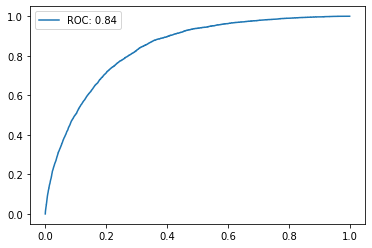

In [114]:
model_eval(log_model, X_test, y_test)

In [115]:
y_train.shape
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_train)
print('training accuracy:', log_reg.score(X_train, y_train))
print('test accuracy:', log_reg.score(X_test, y_test))

training accuracy: 0.9158960332880265
test accuracy: 0.9156962563634317


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [116]:
conf_matrix = confusion_matrix(y_train, y_pred)
conf_mat_mod = conf_matrix / conf_matrix.sum(axis=1).reshape(-1,1)
conf_mat_mod



array([[0.99158208, 0.00841792],
       [0.89168937, 0.10831063]])

<AxesSubplot:>

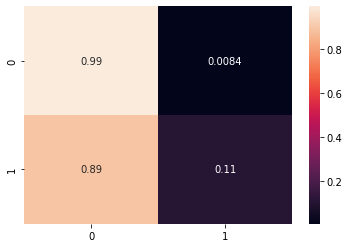

In [163]:
sns.heatmap(conf_mat_mod, annot=True)

In [128]:
train, test = train_test_split(heart,stratify=heart['HeartDisease'],test_size=.2,random_state=0)

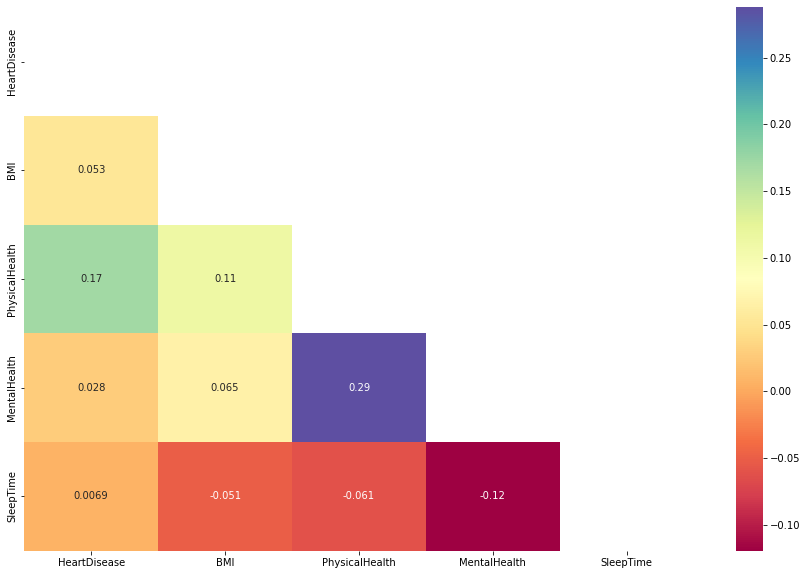

In [129]:
plt.figure(figsize=(15,10))
Mp = np.triu(np.ones_like(train.corr(), dtype=bool))
sns.heatmap(train.corr(), mask=Mp, cmap='Spectral', annot=True)
plt.show()

In [127]:
train_corr = train.corr()
train_corr[(train_corr > 0.2) & (train_corr < 1.0)].stack()

PhysicalHealth  MentalHealth      0.287765
MentalHealth    PhysicalHealth    0.287765
dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


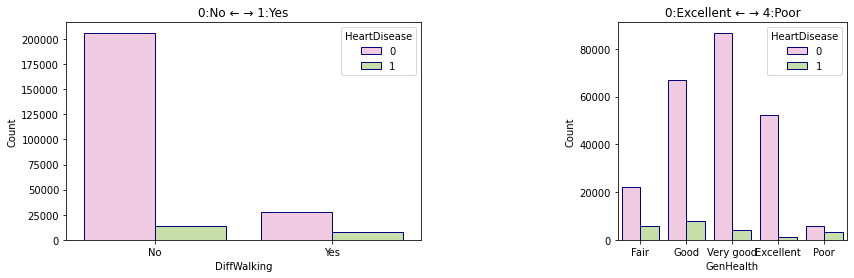

In [159]:
plt.subplots(1,3,figsize=(14,4))

plt.subplot(1,2,1)
sns.countplot(train['DiffWalking'], hue=train['HeartDisease'],palette="PiYG", linewidth=1.0, edgecolor="navy")
plt.title('0:No ← → 1:Yes')
plt.ylabel('Count')
plt.subplot(1,3,3)
sns.countplot(train['GenHealth'], hue=train['HeartDisease'],palette="PiYG", linewidth=1.0, edgecolor="navy")
plt.title('0:Excellent ← → 4:Poor')
plt.ylabel('Count')
plt.show()

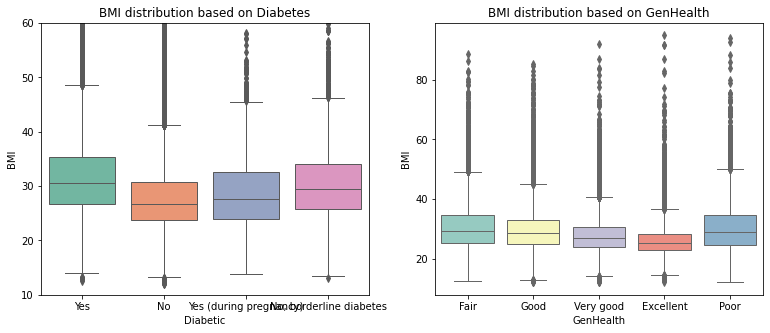

In [158]:
plt.subplots(1,2,figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x=train['Diabetic'],y=train['BMI'],linewidth=1,palette='Set2')
plt.ylim(ymin=10,ymax=60)
plt.title('BMI distribution based on Diabetes')
plt.ylabel('BMI')
plt.subplot(1,3,2)
sns.boxplot(x=train['GenHealth'],y=train['BMI'],linewidth=1,palette='Set3')
plt.title('BMI distribution based on GenHealth')

plt.show()